# Install & Import Package

In [ ]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 7.9 MB/s eta 0:00:00


In [ ]:
# LIBRARY UNTUK MENGOLAH DATA
import pandas as pd
import numpy as np
import re,string #import regular expression
import Sastrawi
import joblib

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import matplotlib as mpl

#Library Untuk Split Data
from sklearn import model_selection
from sklearn.model_selection import train_test_split

#Library Ekstraksi Fitur TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder

#Library Klasifikasi Support Vector Machine
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import f1_score as f1
from sklearn .metrics import accuracy_score as acc
from sklearn.metrics import precision_score as prec
from sklearn.metrics import recall_score as recall
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics


#Library HyperParameter Tuning
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import timeit

import warnings
warnings.filterwarnings('ignore')

# Import Dataset "Hasil Prepro Aspek Errors

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ulasan_aspek_errors = pd.read_csv("/content/drive/MyDrive/TA_ADIN_ASBA_STARBUCKS_APP/hasil_prepro_aspek_errors_starbucks_app.csv")
ulasan_aspek_errors.shape

(1500, 3)

In [ ]:
ulasan_aspek_errors['Errors'].value_counts()

1    838
0    662
Name: Errors, dtype: int64

In [ ]:
#detect missing values
ulasan_aspek_errors.isna().sum()

Ulasan      0
stemming    0
Errors      0
dtype: int64

# Inisialisasi Data

In [ ]:
x_errors = ulasan_aspek_errors['stemming'] #hasil stemming
y_errors = ulasan_aspek_errors['Errors'].values #labelnya

# Split Data

In [ ]:
from sklearn.model_selection import train_test_split

#Perbandingan data train dan data test sebesar 8:2
x_errors_train, x_errors_test, y_errors_train, y_errors_test = train_test_split(
    ulasan_aspek_errors['stemming'],
    ulasan_aspek_errors['Errors'],
    test_size=0.2)

train_df = pd.DataFrame()
train_df['Ulasan'] = x_errors_train
train_df['sentiment'] = y_errors_train
test_df = pd.DataFrame()
test_df['Ulasan'] = x_errors_test
test_df['sentiment'] = y_errors_test

# Feature TF-IDF "x_errors"

In [ ]:
#merubah nilai x_errors menjadi sebuah angka bukan teks
tfidf_vect = TfidfVectorizer(use_idf=True)
tfidf_vect.fit(x_errors_train)
x_errors_train_vectorized = tfidf_vect.transform(x_errors_train)
x_errors_test_vectorized = tfidf_vect.transform(x_errors_test)

In [ ]:
print (x_errors_train_vectorized)

  (0, 1556)	0.352483753608123
  (0, 1454)	0.37948417916392657
  (0, 1012)	0.4726661428986052
  (0, 805)	0.52153206312983
  (0, 574)	0.45693483029364923
  (0, 61)	0.1659775483492311
  (1, 98)	1.0
  (2, 1571)	0.18046156612030642
  (2, 1556)	0.23995785839363762
  (2, 1521)	0.22349896419525545
  (2, 1501)	0.4133835067373604
  (2, 1251)	0.21500755618721124
  (2, 943)	0.32177356892092696
  (2, 846)	0.35503967394588437
  (2, 637)	0.273223963418595
  (2, 541)	0.35503967394588437
  (2, 433)	0.17860354654767763
  (2, 184)	0.4249620673180545
  (3, 1376)	0.6099224097851381
  (3, 429)	0.6099224097851381
  (3, 273)	0.362933646303842
  (3, 220)	0.29426289218402313
  (3, 61)	0.1941077709620919
  (4, 1571)	0.32469513591791127
  (4, 1521)	0.40213009405289113
  :	:
  (1191, 196)	0.39615066339652316
  (1191, 7)	0.37443798088090946
  (1192, 450)	0.5833648531410996
  (1192, 278)	0.4953460218278102
  (1192, 236)	0.643675202861681
  (1193, 1384)	0.6517117999376488
  (1193, 855)	0.31600241164804016
  (1193, 35

# Klasifikasi SVM dengan K-Fold Cross Validation Menggunakan Kernel Linear

Kernel Linear memiliki akurasi paling tinggi sebesar 0.9208 (Tanpa Hyperparamater Tunning)

In [ ]:
#Membuat Model dg Kernel Linear
clf_linear = SVC(kernel='linear')

#Evaluasi dg K-Fold Cross Validation
#Menggunakan Data Train untuk Melatih Model
cv_linear = cross_val_score(clf_linear, x_errors_train_vectorized, y_errors_train, scoring='accuracy', cv=5)

#Hasil Setelah dilakukan 5x Fold (cv=5)
print("Accuracy Score Linear of : %0.4f" % (cv_linear.mean()))

Accuracy Score Linear of : 0.8650


# Klasifikasi SVM dengan K-Fold Cross Validation Menggunakan Kernel Polynomial

In [ ]:
#Membuat Model dg Kernel Polynomial
clf_poly = SVC(kernel='poly')

#Evaluasi dg K-Fold Cross Validation
#Menggunakan Data Train untuk Melatih Model
cv_poly = cross_val_score(clf_poly, x_errors_train_vectorized, y_errors_train, scoring='accuracy', cv=5)

#Hasil Setelah 5lipatan/fold (nilai cv=5)
print("Accuracy Score Poly of : %0.4f" % (cv_poly.mean()))

Accuracy Score Poly of : 0.7483


# Klasifikasi SVM dengan K-Fold Cross Validation Menggunakan Kernel RBF

In [ ]:
#Membuat Model dg Kernel rbf
clf_rbf = SVC(kernel='rbf')

#Evaluasi dg K-Fold Cross Validation
#Menggunakan Data Train untuk Melatih Model
cv_rbf= cross_val_score(clf_rbf, x_errors_train_vectorized, y_errors_train, scoring='accuracy', cv=5)

#Hasil Setelah 5lipatan/fold (nilai cv=5)
print("Accuracy Score RBF of : %0.4f" % (cv_rbf.mean()))

Accuracy Score RBF of : 0.8467


# Klasifikasi SVM (Hyperparameter Tunning) Menggunakan Kernel Linear

In [ ]:
#Tuning Parameter with GridSearchCV
#LINEAR KERNEL

param_grid = {'C': [0.1, 1, 10, 100],
              'kernel': ['linear'],
              'gamma' :[0.01, 0.1, 1, 10]
             }

grid = GridSearchCV(svm.SVC(), param_grid, scoring='accuracy', refit = True, verbose = 3)
# fitting the model for grid search
grid.fit(x_errors_train_vectorized, y_errors_train)

selected_kernel_linear = grid.best_params_['kernel']
print("Selected Kernel: ", selected_kernel_linear)
selected_C_linear = grid.best_params_['C']
print("Selected C: ", selected_C_linear)
selected_gamma_linear= grid.best_params_['gamma']
print("Selected Gamma: ", selected_gamma_linear)

best_params_linear_HT = grid.best_params_
model_looks_linear_HT= grid.best_estimator_

print(f'Best Score : {grid.best_score_}')
print("best estimator: %s" % (model_looks_linear_HT))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.667 total time=   0.1s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.717 total time=   0.1s
[CV 3/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.692 total time=   0.1s
[CV 4/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.708 total time=   0.1s
[CV 5/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.713 total time=   0.1s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.667 total time=   0.1s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.717 total time=   0.1s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.692 total time=   0.1s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.708 total time=   0.1s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.713 total time=   0.1s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.667 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;

# Klasifikasi SVM (Hyperparameter Tunning) Menggunakan Kernel Polynomial

In [ ]:
#Tuning Parameter with GridSearchCV
#Kernel Polynomial

param_grid = {'C': [0.1, 1, 10, 100],
              'kernel': ['poly'],
              'gamma' :[0.01, 0.1, 1, 10]
             }

grid = GridSearchCV(svm.SVC(), param_grid, scoring='accuracy', refit = True, verbose = 3)
# fitting the model for grid search
grid.fit(x_errors_train_vectorized, y_errors_train)


selected_kernel_poly = grid.best_params_['kernel']
print("Selected Kernel: ", selected_kernel_poly)
selected_C_poly= grid.best_params_['C']
print("Selected C: ", selected_C_poly)
selected_gamma_poly = grid.best_params_['gamma']
print("Selected Gamma: ", selected_gamma_poly)


best_params_poly_HT = grid.best_params_
model_looks_poly_HT= grid.best_estimator_

print(f'Best Score : {grid.best_score_}')
print("best estimator: %s" % (model_looks_poly_HT))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=poly;, score=0.562 total time=   0.1s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=poly;, score=0.562 total time=   0.1s
[CV 3/5] END ....C=0.1, gamma=0.01, kernel=poly;, score=0.562 total time=   0.1s
[CV 4/5] END ....C=0.1, gamma=0.01, kernel=poly;, score=0.562 total time=   0.1s
[CV 5/5] END ....C=0.1, gamma=0.01, kernel=poly;, score=0.558 total time=   0.1s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.562 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.562 total time=   0.1s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.562 total time=   0.1s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.562 total time=   0.1s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.558 total time=   0.1s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.613 total time=   0.1s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;

# Klasifikasi SVM (Hyperparameter Tunning) Menggunakan Kernel RBF

Hyperparameter terbaik untuk aspek efficiency ada pada kernel RBF dg C=100, gamma 0.01, score=0.9275

In [ ]:
#Tuning Parameter with GridSearchCV
#Kernel RBF

param_grid = {'C': [0.1, 1, 10, 100],
              'kernel': ['rbf'],
              'gamma' :[0.01, 0.1, 1, 10]
             }

grid = GridSearchCV(svm.SVC(), param_grid, scoring='accuracy', refit = True, verbose = 3)
# fitting the model for grid search
grid.fit(x_errors_train_vectorized, y_errors_train)

selected_kernel_rbf = grid.best_params_['kernel']
print("Selected Kernel: ", selected_kernel_rbf)
selected_C_rbf = grid.best_params_['C']
print("Selected C: ", selected_C_rbf)
selected_gamma_rbf= grid.best_params_['gamma']
print("Selected Gamma: ", selected_gamma_rbf)

best_params_rbf_HT = grid.best_params_
model_looks_rbf_HT= grid.best_estimator_

print(f'Best Score : {grid.best_score_}')
print("best estimator: %s" % (model_looks_rbf_HT))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.562 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.562 total time=   0.1s
[CV 3/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.562 total time=   0.1s
[CV 4/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.562 total time=   0.1s
[CV 5/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.558 total time=   0.1s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.596 total time=   0.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.613 total time=   0.1s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.621 total time=   0.1s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.617 total time=   0.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.621 total time=   0.1s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.683 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;

# K-Fold Cross Validation dengan Hyperparameter Tunning

In [ ]:
cross_val_score_linear= cross_val_score(model_looks_linear_HT, x_errors_train_vectorized, y_errors_train, scoring='accuracy', cv=5)
print("Accuracy Score Linear of : %0.4f" % cross_val_score_linear.mean(), cross_val_score_linear.std())

cross_val_score_poly = cross_val_score(model_looks_poly_HT, x_errors_train_vectorized, y_errors_train, scoring='accuracy', cv=5)
print("Accuracy Score poly of : %0.4f" % cross_val_score_poly.mean(), cross_val_score_poly.std())

cross_val_score_rbf = cross_val_score(model_looks_rbf_HT, x_errors_train_vectorized, y_errors_train, scoring='accuracy', cv=5)
print("Accuracy Score rbf of : %0.4f" % cross_val_score_rbf.mean(), cross_val_score_rbf.std())

Accuracy Score Linear of : 0.8650 0.021826334756181356
Accuracy Score poly of : 0.7417 0.009860132971832686
Accuracy Score rbf of : 0.8825 0.023775571029478502


# Visualisasi Pengaruh Hyperparameter Tunning pada Model Klasifikasi SVM di Aspek Efficiency

Hyperparameter tunning pada aspek efficiency hanya berpengaruh pada kernel RBF dengan kenaikan sebesar 0.0075

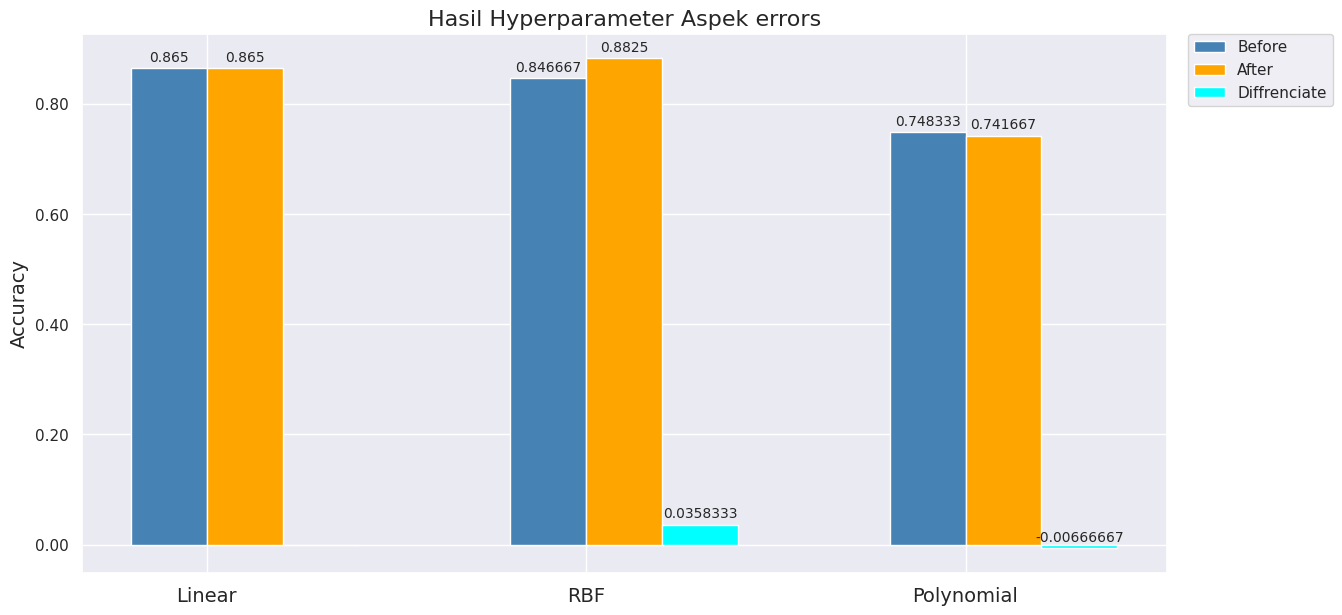

In [ ]:
import numpy as np
from matplotlib.ticker import FormatStrFormatter

import matplotlib.pyplot as plt
%matplotlib inline


name = ['Linear', 'RBF', 'Polynomial']
before_HT = [cv_linear.mean(), cv_rbf.mean(), cv_poly.mean()]
after_HT = [cross_val_score_linear.mean(), cross_val_score_rbf.mean(), cross_val_score_poly.mean()]
diff_linear = ((cross_val_score_linear.mean()-cv_linear.mean()))
diff_rbf = ((cross_val_score_rbf.mean()-cv_rbf.mean()))
diff_poly = ((cross_val_score_poly.mean()-cv_poly.mean()))
diff_HT = [diff_linear, diff_rbf, diff_poly]

x = np.arange(len(name))
width = 0.2

fig, ax = plt.subplots(figsize=(14, 7))

bfr = ax.bar(x - width/2, before_HT, width, label='Before', color='steelblue')
aftr = ax.bar(x + width/2, after_HT, width, label='After', color='orange')
diff = ax.bar(x + 0.3, diff_HT, width, label='Diffrenciate', color='cyan')

ax.set_title('Hasil Hyperparameter Aspek errors', size=16)
ax.set_ylabel('Accuracy', size=14)
ax.set_xticks(x)
ax.set_xticklabels(name, size=14)
ax.legend(fontsize=14)
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
ax.yaxis.set_major_formatter(FormatStrFormatter("%0.2f"))
for p in ax.patches:
    h = p.get_height()
    x = p.get_x()+p.get_width()/2
    if h!= 0:
      ax.annotate("%g" % p.get_height(), xy=(x,h), xytext=(0,5), textcoords="offset points",
                  ha="center", fontsize=10)

plt.show()

# Validasi Model Hyperparameter Tunning Data Test Linear Kernel

In [ ]:
grid_predictions = model_looks_linear_HT.predict(x_errors_test_vectorized)

print("F1-SCORE ",f1(y_errors_test,grid_predictions,average='macro') * 100)
print("ACCURACY ",acc(y_errors_test,grid_predictions) * 100)
print("PRECISION ",prec(y_errors_test,grid_predictions,average='macro') * 100)
print("RECALL",recall(y_errors_test,grid_predictions,average='macro') * 100)

print('Confusion Matrix : \n', confusion_matrix(y_errors_test, grid_predictions))
print('Report Hasil : \n',classification_report(y_errors_test, grid_predictions))

F1-SCORE  85.51196666629231
ACCURACY  85.66666666666667
PRECISION  85.59497546260862
RECALL 85.44655667144907
Confusion Matrix : 
 [[113  23]
 [ 20 144]]
Report Hasil : 
               precision    recall  f1-score   support

           0       0.85      0.83      0.84       136
           1       0.86      0.88      0.87       164

    accuracy                           0.86       300
   macro avg       0.86      0.85      0.86       300
weighted avg       0.86      0.86      0.86       300



# Validasi Model Hyperparameter Tunning Data Test Polynomial Kernel

In [ ]:
grid_predictions = model_looks_poly_HT.predict(x_errors_test_vectorized)

print("F1-SCORE ",f1(y_errors_test,grid_predictions,average='macro') * 100)
print("ACCURACY ",acc(y_errors_test,grid_predictions) * 100)
print("PRECISION ",prec(y_errors_test,grid_predictions,average='macro') * 100)
print("RECALL",recall(y_errors_test,grid_predictions,average='macro') * 100)

print('Confusion Matrix : \n', confusion_matrix(y_errors_test, grid_predictions))
print('Report Hasil : \n',classification_report(y_errors_test, grid_predictions))

F1-SCORE  72.03689167974882
ACCURACY  74.66666666666667
PRECISION  80.48245614035088
RECALL 72.43543758967002
Confusion Matrix : 
 [[ 66  70]
 [  6 158]]
Report Hasil : 
               precision    recall  f1-score   support

           0       0.92      0.49      0.63       136
           1       0.69      0.96      0.81       164

    accuracy                           0.75       300
   macro avg       0.80      0.72      0.72       300
weighted avg       0.79      0.75      0.73       300



# Validasi Model Hyperparameter Tunning Data Test RBF Kernel

In [ ]:
grid_predictions = model_looks_rbf_HT.predict(x_errors_test_vectorized)

print("F1-SCORE ",f1(y_errors_test,grid_predictions,average='macro') * 100)
print("ACCURACY ",acc(y_errors_test,grid_predictions) * 100)
print("PRECISION ",prec(y_errors_test,grid_predictions,average='macro') * 100)
print("RECALL",recall(y_errors_test,grid_predictions,average='macro') * 100)

print('Confusion Matrix : \n', confusion_matrix(y_errors_test, grid_predictions))
print('Report Hasil : \n',classification_report(y_errors_test, grid_predictions))

F1-SCORE  85.3938563615983
ACCURACY  85.66666666666667
PRECISION  85.99283450461624
RECALL 85.13271162123385
Confusion Matrix : 
 [[108  28]
 [ 15 149]]
Report Hasil : 
               precision    recall  f1-score   support

           0       0.88      0.79      0.83       136
           1       0.84      0.91      0.87       164

    accuracy                           0.86       300
   macro avg       0.86      0.85      0.85       300
weighted avg       0.86      0.86      0.86       300



# Validasi Model Hyperparameter Tunning Data Train Linear Kernel

In [ ]:
grid_predictions = model_looks_linear_HT.predict(x_errors_train_vectorized)

print("F1-SCORE ",f1(y_errors_train,grid_predictions,average='macro') * 100)
print("ACCURACY ",acc(y_errors_train,grid_predictions) * 100)
print("PRECISION ",prec(y_errors_train,grid_predictions,average='macro') * 100)
print("RECALL",recall(y_errors_train,grid_predictions,average='macro') * 100)

print('Confusion Matrix : \n', confusion_matrix(y_errors_train, grid_predictions))
print('Report Hasil : \n',classification_report(y_errors_train, grid_predictions))

F1-SCORE  96.94842844064694
ACCURACY  97.0
PRECISION  97.0357454228422
RECALL 96.87016957949251
Confusion Matrix : 
 [[504  22]
 [ 14 660]]
Report Hasil : 
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       526
           1       0.97      0.98      0.97       674

    accuracy                           0.97      1200
   macro avg       0.97      0.97      0.97      1200
weighted avg       0.97      0.97      0.97      1200



# Validasi Model Hyperparameter Tunning Data Train Polynomial Kernel

In [ ]:
grid_predictions = model_looks_poly_HT.predict(x_errors_train_vectorized)

print("F1-SCORE ",f1(y_errors_train,grid_predictions,average='macro') * 100)
print("ACCURACY ",acc(y_errors_train,grid_predictions) * 100)
print("PRECISION ",prec(y_errors_train,grid_predictions,average='macro') * 100)
print("RECALL",recall(y_errors_train,grid_predictions,average='macro') * 100)

print('Confusion Matrix : \n', confusion_matrix(y_errors_train, grid_predictions))
print('Report Hasil : \n',classification_report(y_errors_train, grid_predictions))

F1-SCORE  93.43801805120648
ACCURACY  93.66666666666667
PRECISION  94.93333333333334
RECALL 92.77566539923954
Confusion Matrix : 
 [[450  76]
 [  0 674]]
Report Hasil : 
               precision    recall  f1-score   support

           0       1.00      0.86      0.92       526
           1       0.90      1.00      0.95       674

    accuracy                           0.94      1200
   macro avg       0.95      0.93      0.93      1200
weighted avg       0.94      0.94      0.94      1200



# Validasi Model Hyperparameter Tunning Data Train RBF Kernel

In [ ]:
grid_predictions = model_looks_rbf_HT.predict(x_errors_train_vectorized)

print("F1-SCORE ",f1(y_errors_train,grid_predictions,average='macro') * 100)
print("ACCURACY ",acc(y_errors_train,grid_predictions) * 100)
print("PRECISION ",prec(y_errors_train,grid_predictions,average='macro') * 100)
print("RECALL",recall(y_errors_train,grid_predictions,average='macro') * 100)

print('Confusion Matrix : \n', confusion_matrix(y_errors_train, grid_predictions))
print('Report Hasil : \n',classification_report(y_errors_train, grid_predictions))

F1-SCORE  99.49248740381931
ACCURACY  99.5
PRECISION  99.47240259740259
RECALL 99.51315002651442
Confusion Matrix : 
 [[524   2]
 [  4 670]]
Report Hasil : 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       526
           1       1.00      0.99      1.00       674

    accuracy                           0.99      1200
   macro avg       0.99      1.00      0.99      1200
weighted avg       1.00      0.99      1.00      1200

